In [4]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import time 
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [6]:
HR_data_PCA = pd.read_csv("/content/drive/MyDrive/Datasets/HR_PCA.csv")

In [7]:
X = HR_data_PCA.drop('Attrition', axis = 1)
y = HR_data_PCA[['Attrition']]
X_train_PCA, X_test_PCA, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
HR_data = pd.read_csv("/content/drive/MyDrive/Datasets/DDA_HR.csv")

In [9]:
X = HR_data.drop('Attrition', axis = 1)
y = HR_data[['Attrition']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
tic = time.time ()
rf.fit(X_train, y_train)
toc = time.time()
# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = rf.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Time Taken: {:.2f}".format(toc-tic))

<ipython-input-10-2b7ac9ba5d04>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Accuracy: 84.30%
Time Taken: 0.31


In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
tic = time.time ()
rf.fit(X_train_PCA, y_train)
toc = time.time()
# Make predictions on the testing set
y_pred = rf.predict(X_test_PCA)

# Evaluate the accuracy of the model
accuracy = rf.score(X_test_PCA, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

<ipython-input-11-b0aa553476d3>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_PCA, y_train)


Accuracy: 83.83%


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

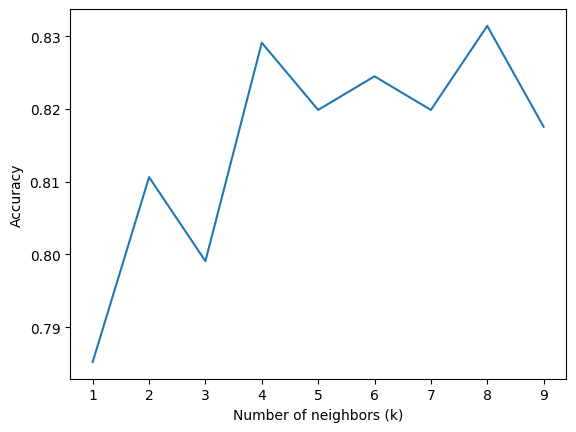

In [12]:
k_values = range(1, 10)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    accuracies.append(accuracy)

# Plot the accuracy vs. k curve
plt.plot(k_values, accuracies)
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy : ", accuracy)

Accuracy :  0.8290993071593533


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [14]:
!pip install pyspark 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=0beaba5ab1a697449803389ec0dae1147632769995b0f2b8aef2507d8d9f48ea
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [15]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator


In [30]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("MyApp").getOrCreate()

# Load a CSV file into a PySpark DataFrame
HR_data = spark.read.csv("/content/drive/MyDrive/Datasets/DDA_HR.csv", header=True, inferSchema=True)


In [32]:

(train_data, test_data) = HR_data.randomSplit([0.7, 0.3])

features = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
assembler = VectorAssembler(inputCols=features, outputCol="features_vector")
train_data = assembler.transform(train_data).select("features_vector", "Attrition")
test_data = assembler.transform(test_data).select("features_vector", "Attrition")

rf = RandomForestClassifier(labelCol="Attrition", featuresCol="features_vector")

In [33]:
train_data

DataFrame[features_vector: vector, Attrition: int]

In [34]:
tic= time.time()
model = rf.fit(train_data)
toc = time.time()
predictions = model.transform(test_data)


evaluator = MulticlassClassificationEvaluator(labelCol="Attrition", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %g" % accuracy)
print("time taken ", toc - tic)

Accuracy = 0.866029
time taken  3.9964685440063477


In [35]:
train_data, test_data = HR_data.randomSplit([0.7, 0.3])

# Define the input and output columns
inputCols = HR_data.columns[:-1]
outputCol = "Attrition"

# Create a VectorAssembler to assemble the features into a single vector column
assembler = VectorAssembler(inputCols=inputCols, outputCol="features")

# Apply the VectorAssembler to the training data
train_data = assembler.transform(train_data).select("features", col(outputCol).alias("Attrition"))

# Create a Random Forest classifier
rf = RandomForestClassifier(labelCol="Attrition", featuresCol="features")
# Define the hyperparameter grid
paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [100, 200, 300])
             .addGrid(rf.maxDepth, [5, 10, 15])
             .build())

# Define the evaluation metric
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", metricName="accuracy", labelCol="Attrition")

# Define the cross-validation
cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=3)

# Fit the model to the training data
model = cv.fit(train_data)

# Apply the VectorAssembler to the testing data
test_data = assembler.transform(test_data).select("features", col(outputCol).alias("Attrition"))

# Make predictions on the testing data
predictions = model.transform(test_data)

# Evaluate the performance of the model
best_model = model.bestModel
print("Best maxtrees:", best_model.getOrDefault("numTrees"))
print("Best maxDepth:", best_model.getOrDefault("maxDepth"))
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %g" % accuracy)

Best maxtrees: 100
Best maxDepth: 10
Accuracy = 0.823009
